### create_agent()

In [1]:
from langchain.agents import create_agent
from langchain.tools import tool
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.prompts import PromptTemplate

system_prompt = SystemMessage(
    content="You are a helpful calculator."
)

load_dotenv()
llm = ChatOpenAI(model="gpt-4o-mini")
@tool
def add(a: int, b: int) -> int:
    "Add two numbers"
    return a + b

@tool
def subtract(a: int, b: int) -> int:
    "Subtract two numbers"
    return a - b

@tool
def multiply(a: int, b: int) -> int:
    "Multiply two numbers"
    return a * b

@tool
def divide(a: int, b: int) -> float:
    "Divide two numbers"
    return a / b

# add_tool = tool(name="add", func=add, description="Add two numbers")
# subtract_tool = tool(name="subtract", func=subtract, description="Subtract two numbers")
# multiply_tool = tool(name="multiply", func=multiply, description="Multiply two numbers")
# divide_tool = tool(name="divide", func=divide, description="Divide two numbers")

agent = create_agent(llm,
tools=[add, subtract, multiply, divide],
system_prompt=system_prompt.content,
debug=True,
)



In [2]:


result = agent.invoke({"messages": [HumanMessage(content="What is 10 + 20?")]})
# print(result["messages"][-1])



print(result["messages"][-1].content)

[values] {'messages': [HumanMessage(content='What is 10 + 20?', additional_kwargs={}, response_metadata={}, id='942c992b-de0f-48c7-96e6-0c3e2a9f0145')]}
[updates] {'model': {'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 122, 'total_tokens': 139, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CSmzgjpoIIQMlKo4ghIksvN69VjOa', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--b6e6fc04-4a39-4c14-85aa-1bc705702750-0', tool_calls=[{'name': 'add', 'args': {'a': 10, 'b': 20}, 'id': 'call_1Efcg32Jgzb6YgYnW3D22TqF', 'type': 'tool_call'}], usage_metadata={'input_tokens': 122, 'outp

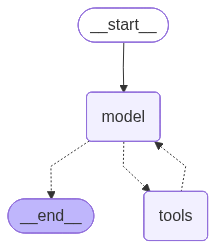

In [5]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

### middleware()

In [ ]:
from langchain.agents.middleware import (
    PIIMiddleware,
    SummarizationMiddleware,
    HumanInTheLoopMiddleware
)

In [20]:
system_prompt = SystemMessage(content="You are a helpful assistant that can answer questions only reated to calculator and help with tasks.")

In [ ]:
agent = create_agent(
    llm,
    tools=[add, subtract, multiply, divide],
    system_prompt=system_prompt.content,
    debug=True,
    middleware=[
        # PIIMiddleware: Not strictly necessary for calculator, but good for general safety
        # You can customize patterns or remove this if not needed
        # PIIMiddleware("credit_card", strategy="mask"),
        # PIIMiddleware("url", strategy="redact"),
        # PIIMiddleware("ip", strategy="hash"),
        
        # SummarizationMiddleware: Useful for long calculation sessions
        SummarizationMiddleware(
            model=llm,
            max_tokens_before_summary=800  # Higher threshold since calculator conversations are usually shorter
        ),
        
        # HumanInTheLoopMiddleware: Customized for your divide tool to prevent division by zero
        # or handle potentially problematic calculations
        HumanInTheLoopMiddleware(
            interrupt_on={
                "divide": {
                    "allowed_decisions": ["approve", "edit", "reject"],
                    "message": "Confirm division operation - check if divisor is zero"
                }
            }
        ),
    ]
)

In [32]:


result = agent.invoke({"messages": [HumanMessage(content="https://www.google.com/search?q=giv+eme+random+ip+exmaple+&sxsrf=AE3TifM-iUVphzF9Mgs6ZRNRaB1Fjy99Kw%3A1760978686908")]})
print(result["messages"][-1].content)

[values] {'messages': [HumanMessage(content='https://www.google.com/search?q=giv+eme+random+ip+exmaple+&sxsrf=AE3TifM-iUVphzF9Mgs6ZRNRaB1Fjy99Kw%3A1760978686908', additional_kwargs={}, response_metadata={}, id='8d8fbea5-91aa-460b-8949-5a105209cb25')]}
[updates] {'SummarizationMiddleware.before_model': None}
[updates] {'model': {'messages': [AIMessage(content="I'm unable to browse the internet, but I can help explain what an IP address is or provide examples if you need. Would you like that instead?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 183, 'total_tokens': 214, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnS7Gx7BuLThXSREZjdBad9q

In [33]:
# [values] {'messages': [HumanMessage(content='169.254. 255.255', additional_kwargs={}, response_metadata={}, id='bf52ba56-de8f-4336-941b-80e3755d19c5')]}
# [updates] {'PIIMiddleware[credit_card].before_model': None}
# [updates] {'PIIMiddleware[url].before_model': None}
# [updates] {'PIIMiddleware[ip].before_model': None}
# [updates] {'SummarizationMiddleware.before_model': None}
# [updates] {'model': {'messages': [AIMessage(content="It looks like you've provided an IP address. Would you like assistance with a calculation or task involving numbers?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 135, 'total_tokens': 157, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnL1dJeLgyHtLGWHBPDietZaIfWB', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3b6724bf-fd51-4219-9c27-3ef6cab17768-0', usage_metadata={'input_tokens': 135, 'output_tokens': 22, 'total_tokens': 157, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
# [values] {'messages': [HumanMessage(content='169.254. 255.255', additional_kwargs={}, response_metadata={}, id='bf52ba56-de8f-4336-941b-80e3755d19c5'), AIMessage(content="It looks like you've provided an IP address. Would you like assistance with a calculation or task involving numbers?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 135, 'total_tokens': 157, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnL1dJeLgyHtLGWHBPDietZaIfWB', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3b6724bf-fd51-4219-9c27-3ef6cab17768-0', usage_metadata={'input_tokens': 135, 'output_tokens': 22, 'total_tokens': 157, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
# [updates] {'HumanInTheLoopMiddleware.after_model': None}
# [updates] {'PIIMiddleware[ip].after_model': None}
# [updates] {'PIIMiddleware[url].after_model': None}
# [updates] {'PIIMiddleware[credit_card].after_model': None}
# It looks like you've provided an IP address. Would you like assistance with a calculation or task involving numbers?



# [values] {'messages': [HumanMessage(content='https://www.google.com/search?q=giv+eme+random+ip+exmaple+&sxsrf=AE3TifM-iUVphzF9Mgs6ZRNRaB1Fjy99Kw%3A1760978686908', additional_kwargs={}, response_metadata={}, id='fbba0f2b-3954-4868-ab99-a5ad2dc31b2e')]}
# [updates] {'PIIMiddleware[credit_card].before_model': None}
# [updates] {'PIIMiddleware[url].before_model': {'messages': [HumanMessage(content='[REDACTED_URL]', additional_kwargs={}, response_metadata={}, id='fbba0f2b-3954-4868-ab99-a5ad2dc31b2e')]}}
# [values] {'messages': [HumanMessage(content='[REDACTED_URL]', additional_kwargs={}, response_metadata={}, id='fbba0f2b-3954-4868-ab99-a5ad2dc31b2e')]}
# [updates] {'PIIMiddleware[ip].before_model': None}
# [updates] {'SummarizationMiddleware.before_model': None}
# [updates] {'model': {'messages': [AIMessage(content="I'm here to help with any calculations or tasks you may have! Please let me know what you need assistance with.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 134, 'total_tokens': 158, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnMH6CFKEotTyLdi1uqV2kYqMclT', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3ccfdb08-baff-462c-96ce-436047614a87-0', usage_metadata={'input_tokens': 134, 'output_tokens': 24, 'total_tokens': 158, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
# [values] {'messages': [HumanMessage(content='[REDACTED_URL]', additional_kwargs={}, response_metadata={}, id='fbba0f2b-3954-4868-ab99-a5ad2dc31b2e'), AIMessage(content="I'm here to help with any calculations or tasks you may have! Please let me know what you need assistance with.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 134, 'total_tokens': 158, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnMH6CFKEotTyLdi1uqV2kYqMclT', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3ccfdb08-baff-462c-96ce-436047614a87-0', usage_metadata={'input_tokens': 134, 'output_tokens': 24, 'total_tokens': 158, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
# [updates] {'HumanInTheLoopMiddleware.after_model': None}
# [updates] {'PIIMiddleware[ip].after_model': None}
# [updates] {'PIIMiddleware[url].after_model': None}
# [updates] {'PIIMiddleware[credit_card].after_model': None}
# I'm here to help with any calculations or tasks you may have! Please let me know what you need assistance with.


In [40]:


agent.invoke({"messages": [HumanMessage(content="what is 10 devide by 0")]})
# print(result["messages"][-1].content)

[values] {'messages': [HumanMessage(content='what is 10 devide by 0', additional_kwargs={}, response_metadata={}, id='05ad76d7-b484-45c5-ae2c-6d7d8e1e19b1')]}
[updates] {'SummarizationMiddleware.before_model': None}
[updates] {'model': {'messages': [AIMessage(content='Dividing by zero is undefined in mathematics. Therefore, the operation \\(10 \\div 0\\) does not have a valid result.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 136, 'total_tokens': 165, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnyMSi8W1UpJRpLZnMIBqp8xBtIV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--23146e4f-38c2-40ab-9cda-f28

{'messages': [HumanMessage(content='what is 10 devide by 0', additional_kwargs={}, response_metadata={}, id='05ad76d7-b484-45c5-ae2c-6d7d8e1e19b1'),
  AIMessage(content='Dividing by zero is undefined in mathematics. Therefore, the operation \\(10 \\div 0\\) does not have a valid result.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 136, 'total_tokens': 165, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CSnyMSi8W1UpJRpLZnMIBqp8xBtIV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--23146e4f-38c2-40ab-9cda-f28bd59a260c-0', usage_metadata={'input_tokens': 136, 'output_tokens': 29, 'total_tokens': 165, 'input

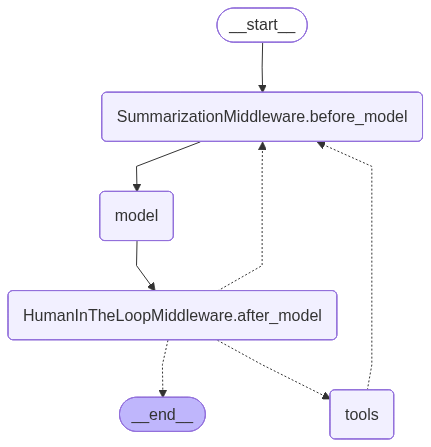

In [36]:
from IPython.display import Image,  display
display(Image(agent.get_graph().draw_mermaid_png()))

###  Planning


In [41]:

from langchain.agents.middleware import TodoListMiddleware

agent = create_agent(
    llm,
    tools=[add, subtract, multiply, divide],
    system_prompt=system_prompt.content,
    debug=True,
    middleware=[TodoListMiddleware()
        # PIIMiddleware: Not strictly necessary for calculator, but good for general safety
        # You can customize patterns or remove this if not needed
        # PIIMiddleware("credit_card", strategy="mask"),
        # PIIMiddleware("url", strategy="redact"),
        # PIIMiddleware("ip", strategy="hash"),
        
        # # SummarizationMiddleware: Useful for long calculation sessions
        # SummarizationMiddleware(
        #     model=llm,
        #     max_tokens_before_summary=800  # Higher threshold since calculator conversations are usually shorter
        # ),
        
        # HumanInTheLoopMiddleware: Customized for your divide tool to prevent division by zero
        # or handle potentially problematic calculations
        # HumanInTheLoopMiddleware(
        #     interrupt_on={
        #         "divide": {
        #             "allowed_decisions": ["approve", "edit", "reject"],
        #             "message": "Confirm division operation - check if divisor is zero"
        #         }
        #     }
        # ),
    ]
)

In [43]:
result = agent.invoke({"messages": [HumanMessage(content="Help me refactor my codebase")]})
# print(result["todos"])  # Array of todo items with status tracking
# agent.invoke({"messages": [HumanMessage(content="what is 10 devide by 0")]})

[values] {'messages': [HumanMessage(content='Help me refactor my codebase', additional_kwargs={}, response_metadata={}, id='50ae8da6-8a25-4fad-a5bb-46de05d36f89')]}
[updates] {'model': {'messages': [AIMessage(content='Refactoring a codebase can be a complex task, as it often involves several steps such as organizing code structure, improving readability, and eliminating redundancies. To help you effectively, could you please provide more details about your codebase? Specifically:\n\n1. What programming language are you using?\n2. Are there specific areas or files in the codebase that you want to focus on?\n3. Do you have any particular goals for the refactoring (e.g., improving performance, enhancing readability)?\n\nOnce I have this information, I can assist you better!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 1203, 'total_tokens': 1315, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tok

In [49]:
print(result["messages"][-1].content)

Refactoring a codebase can be a complex task, as it often involves several steps such as organizing code structure, improving readability, and eliminating redundancies. To help you effectively, could you please provide more details about your codebase? Specifically:

1. What programming language are you using?
2. Are there specific areas or files in the codebase that you want to focus on?
3. Do you have any particular goals for the refactoring (e.g., improving performance, enhancing readability)?

Once I have this information, I can assist you better!


In [ ]:

print(result["todos"])  # Array of todo items with status tracking


KeyError: 'todos'